##### problem statement
###### We intend to develop a comprehensive predictive model for lung cancer risk assesment using a dataset enriched with a wide array of patient attributes,including gender,age,smoking history,and a spectrum of health-related indicators.

In [1]:
#import need library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)

                                 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import KFold
#from xgboost import XGBClassifier

In [2]:
# read the data
df=pd.read_csv("D:\survey lung cancer.csv")
df

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
304                2         2         1         1                  2   
305                1         2         2         2                  2   
306                1         1         2         2                  2   
307                1         2         2         1                  2   
308                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           2                    2                      2           2   
1           1                    2                      2           2   
2           2                    2                      1           2   
3           1                    1                      2           2   
4           2                    2                      1           1   
..        ...                  ...                    ...         ...   
304         2                    2                      2           1   
305         2                    2                      1           2   
306         2                    1                      1           2   
307         2                    2                      1           2   
308         1                    1                      2           1   

    LUNG_CANCER  
0           YES  
1           YES  
2            NO  
3            NO  
4            NO  
..          ...  
304         YES  
305         YES  
306         YES  
307         YES  
308         YES  

[309 rows x 16 columns]

###### GENDER: The individual's gender, whether male or female (M/F)
###### AGE: The person's age in years
###### SMOKING: A binary indicator of smoking history (Yes=2/No=1)
###### YELLOW FINGERS: Presence of yellowing of fingers (Yes=2/No=1)
###### ANXIETY: Presence of anxiety issues (Yes=2/No=1)
###### PEER_PRESSURE: Exposure to peer pressure (Yes=2/No=1)
###### CHRONIC DISEASE: Presence of chronic diseases (Yes=2/No=1)
###### FATIGUE: Presence of chronic tiredness or fatigue (Yes=2/No=1)
###### ALLERGY: Presence of allergies (Yes=2/No=1)
###### WHEEZING: Occurrence of wheezing (Yes=2/No=1)
###### ALCOHOL: Alcohol consumption (Yes=2/No=1)
###### COUGHING: Presence of chronic coughing (Yes=2/No=1)
###### SHORTNESS OF BREATH: Experience of shortness of breath (Yes=2/No=1)
###### SWALLOWING DIFFICULTY: Difficulty in swallowing (Yes=2/No=1)
###### CHEST PAIN: Presence of chest pain (Yes=2/No=1)
###### LUNG_CANCER: Has Lung Cancer or not (YES/NO)

In [3]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [4]:
# convert the column upper case to lower case
df.columns=df.columns.str.lower()

In [5]:
df.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

In [6]:
# remove the space for both ends
df.columns=df.columns.str.strip()
df.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

In [7]:

df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')

In [8]:
df.shape

(309, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol_consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness_of_breath    309 non-null    int64 
 13  swallowing_difficulty  309 non-null    int64 
 14  chest_pain             309 non-null    int64 
 15  lung_cancer            

In [10]:
#check null values
df.isna().any()

gender                   False
age                      False
smoking                  False
yellow_fingers           False
anxiety                  False
peer_pressure            False
chronic_disease          False
fatigue                  False
allergy                  False
wheezing                 False
alcohol_consuming        False
coughing                 False
shortness_of_breath      False
swallowing_difficulty    False
chest_pain               False
lung_cancer              False
dtype: bool

In [11]:
df.duplicated().sum()

33

In [12]:
df=df.drop_duplicates()
df.shape


(276, 16)

In [13]:
#statistical summary for categorical  columns
df["age"].describe()

count    276.000000
mean      62.909420
std        8.379355
min       21.000000
25%       57.750000
50%       62.500000
75%       69.000000
max       87.000000
Name: age, dtype: float64

In [14]:
df["gender"]=df["gender"].replace({"M":1,"F":2})

df['lung_cancer'] = df['lung_cancer'].replace({"YES":1,"NO":0})


C:\Users\Rv\AppData\Local\Temp\ipykernel_12884\3435121792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender"]=df["gender"].replace({"M":1,"F":2})
C:\Users\Rv\AppData\Local\Temp\ipykernel_12884\3435121792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lung_cancer'] = df['lung_cancer'].replace({"YES":1,"NO":0})


In [15]:
corr_matrix=df.corr()
corr_matrix

gender       age   smoking  yellow_fingers   anxiety  \
gender                 1.000000  0.013120 -0.041131        0.202506  0.152032   
age                    0.013120  1.000000 -0.073410        0.025773  0.050605   
smoking               -0.041131 -0.073410  1.000000       -0.020799  0.153389   
yellow_fingers         0.202506  0.025773 -0.020799        1.000000  0.558344   
anxiety                0.152032  0.050605  0.153389        0.558344  1.000000   
peer_pressure          0.261427  0.037848 -0.030364        0.313067  0.210278   
chronic_disease        0.189925 -0.003431 -0.149415        0.015316 -0.006938   
fatigue                0.079020  0.021606 -0.037803       -0.099644 -0.181474   
allergy               -0.150174  0.037139 -0.030179       -0.147130 -0.159451   
wheezing              -0.121047  0.052803 -0.147081       -0.058756 -0.174009   
alcohol_consuming     -0.434264  0.052049 -0.052771       -0.273643 -0.152228   
coughing              -0.120228  0.168654 -0.138553        0.020803 -0.218843   
shortness_of_breath    0.052893 -0.009189  0.051761       -0.109959 -0.155678   
swallowing_difficulty  0.048959  0.003199  0.042152        0.333349  0.478820   
chest_pain            -0.361547 -0.035806  0.106984       -0.099169 -0.123182   
lung_cancer           -0.053666  0.106305  0.034878        0.189192  0.144322   

                       peer_pressure  chronic_disease   fatigue   allergy  \
gender                      0.261427         0.189925  0.079020 -0.150174   
age                         0.037848        -0.003431  0.021606  0.037139   
smoking                    -0.030364        -0.149415 -0.037803 -0.030179   
yellow_fingers              0.313067         0.015316 -0.099644 -0.147130   
anxiety                     0.210278        -0.006938 -0.181474 -0.159451   
peer_pressure               1.000000         0.042893  0.094661 -0.066887   
chronic_disease             0.042893         1.000000 -0.099411  0.134309   
fatigue                     0.094661        -0.099411  1.000000 -0.001841   
allergy                    -0.066887         0.134309 -0.001841  1.000000   
wheezing                   -0.037769        -0.040546  0.152151  0.166517   
alcohol_consuming          -0.132603         0.010144 -0.181573  0.378125   
coughing                   -0.068224        -0.160813  0.148538  0.206367   
shortness_of_breath        -0.214115        -0.011760  0.407027 -0.018030   
swallowing_difficulty       0.327764         0.068263 -0.115727 -0.037581   
chest_pain                 -0.074655        -0.048895  0.013757  0.245440   
lung_cancer                 0.195086         0.143692  0.160078  0.333552   

                       wheezing  alcohol_consuming  coughing  \
gender                -0.121047          -0.434264 -0.120228   
age                    0.052803           0.052049  0.168654   
smoking               -0.147081          -0.052771 -0.138553   
yellow_fingers        -0.058756          -0.273643  0.020803   
anxiety               -0.174009          -0.152228 -0.218843   
peer_pressure         -0.037769          -0.132603 -0.068224   
chronic_disease       -0.040546           0.010144 -0.160813   
fatigue                0.152151          -0.181573  0.148538   
allergy                0.166517           0.378125  0.206367   
wheezing               1.000000           0.261061  0.353657   
alcohol_consuming      0.261061           1.000000  0.198023   
coughing               0.353657           0.198023  1.000000   
shortness_of_breath    0.042289          -0.163370  0.284968   
swallowing_difficulty  0.108304          -0.000635 -0.136885   
chest_pain             0.142846           0.310767  0.077988   
lung_cancer            0.249054           0.294422  0.253027   

                       shortness_of_breath  swallowing_difficulty  chest_pain  \
gender                            0.052893               0.048959   -0.361547   
age                              -0.009189               0.003199   -0.035806   
smoki

<Axes: >

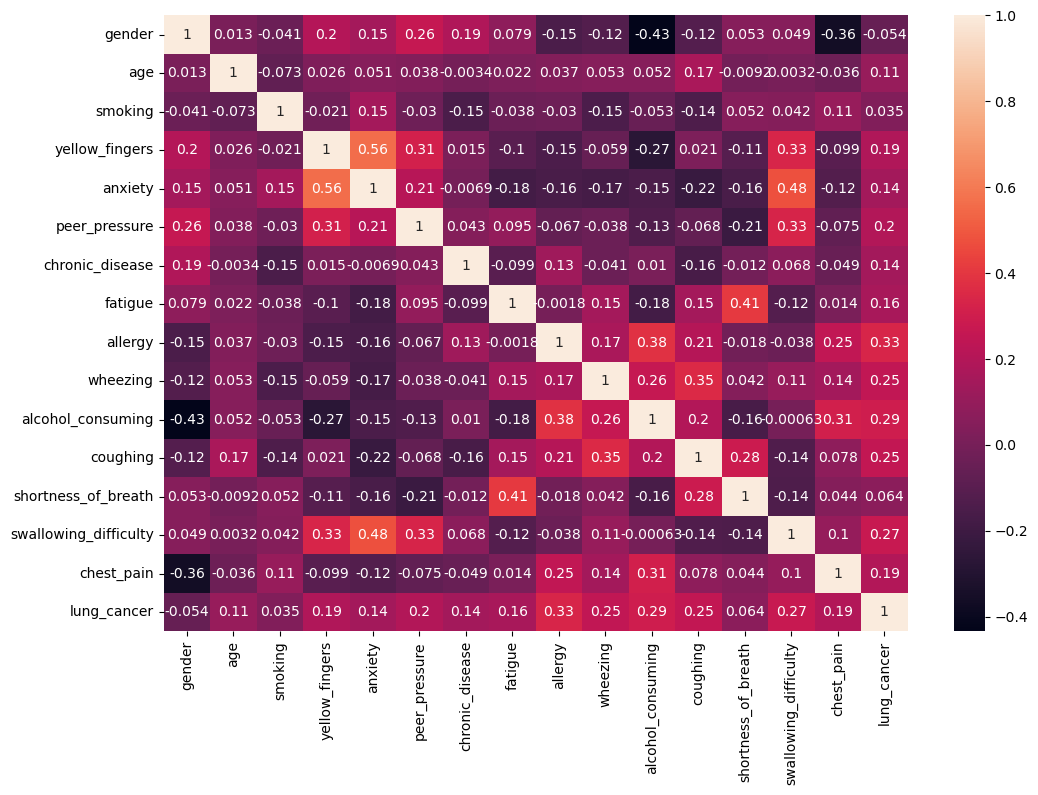

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data=corr_matrix,annot=True)#corelation

#### EDA
##### univariate analysis


##### distribution numerical columns 

C:\Users\Rv\AppData\Local\Temp\ipykernel_12884\3034797289.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],  ax=axes[0])


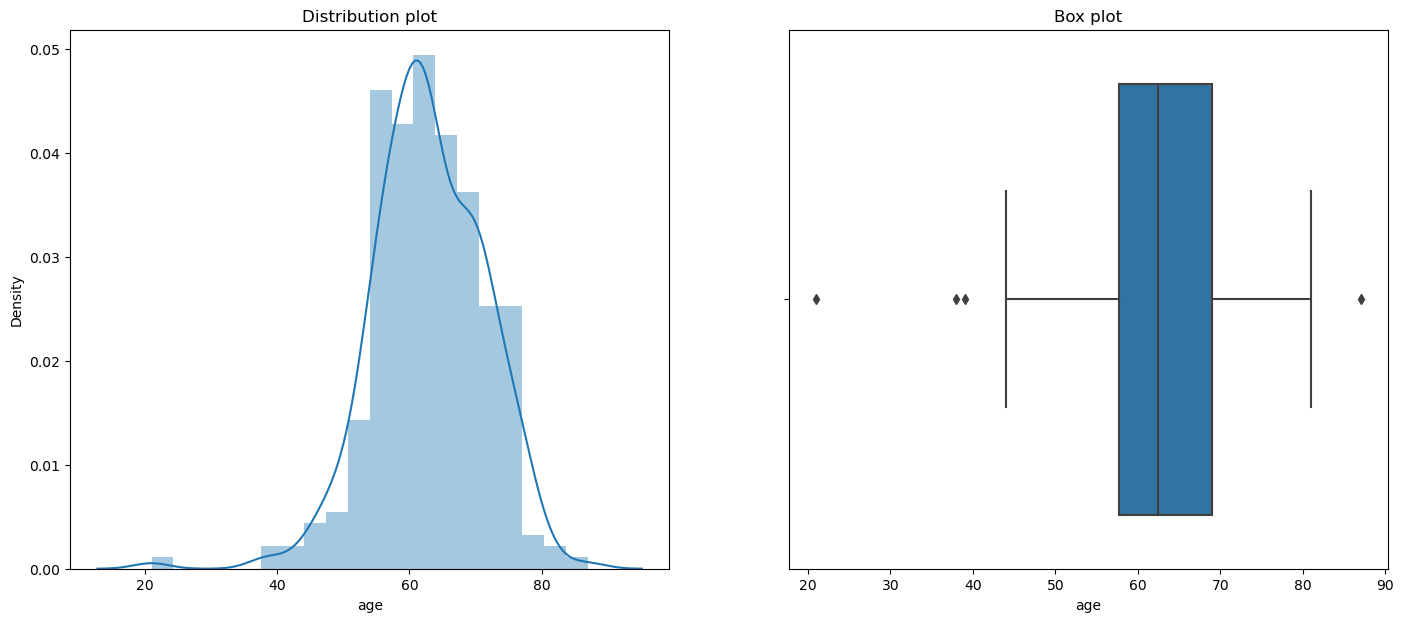

 Total Number of outliers in age: 4


In [17]:
# age

f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'age', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['age'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['age'],25),np.percentile(df['age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['age'] if i < lower or i > upper]
print('{} Total Number of outliers in age: {}'.format('\033[1m',len(Outliers)))

## distribution of categorical 

C:\Users\Rv\AppData\Local\Temp\ipykernel_12884\1781303180.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x="lung_cancer",shade=True,fill=True,color='red')


Text(0.5, 1.0, 'distribution of lung cancer')

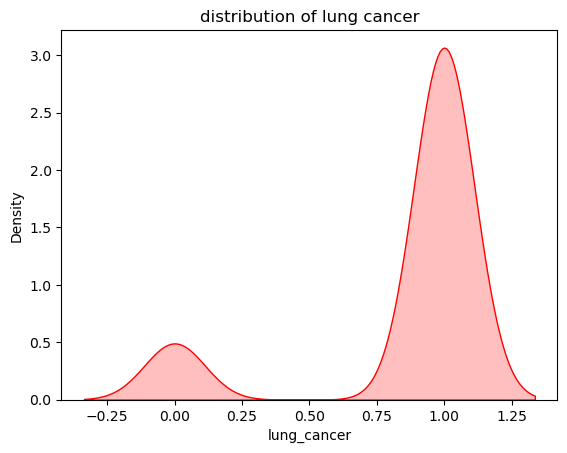

In [18]:
sns.kdeplot(data=df,x="lung_cancer",shade=True,fill=True,color='red')
plt.title("distribution of lung cancer")

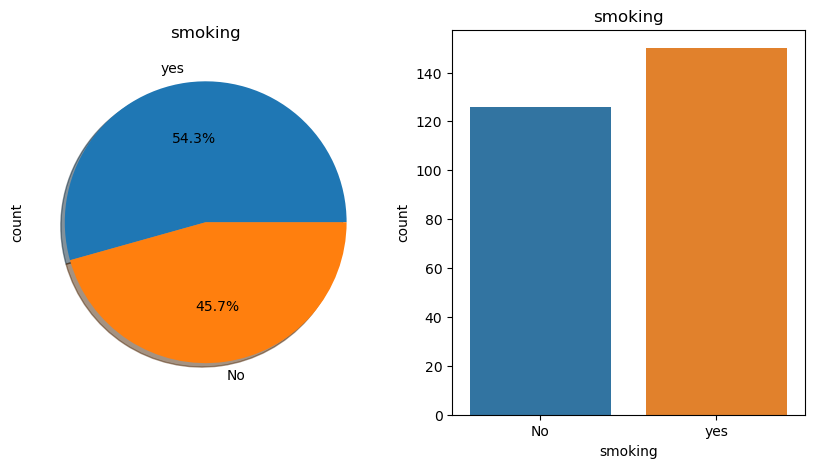

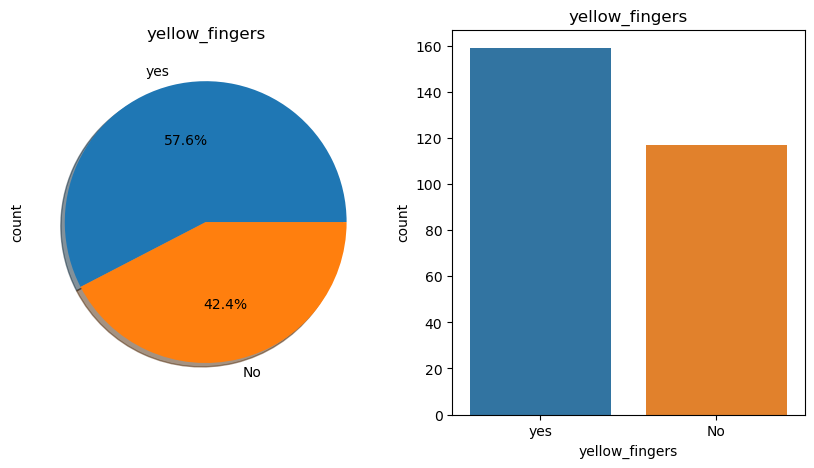

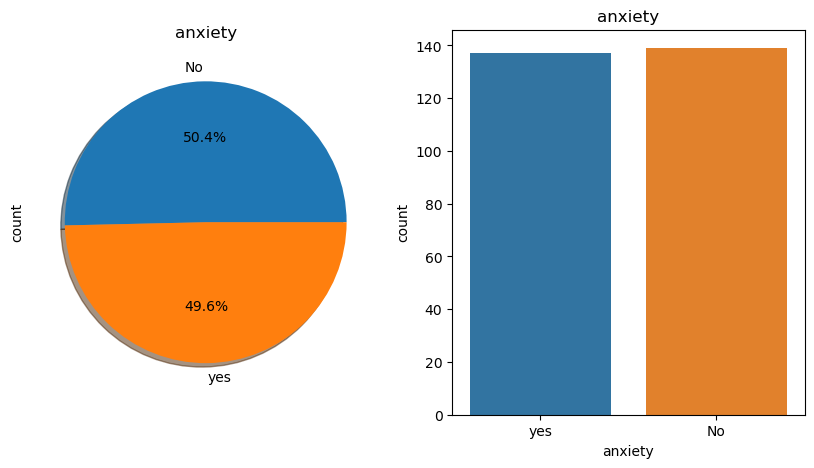

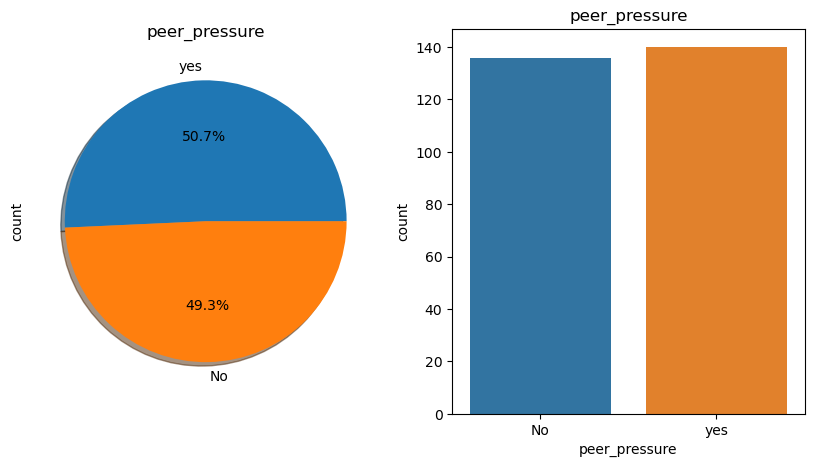

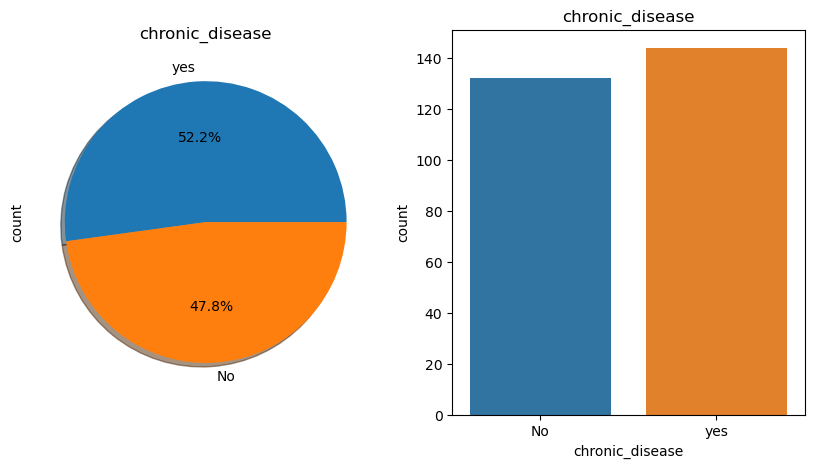

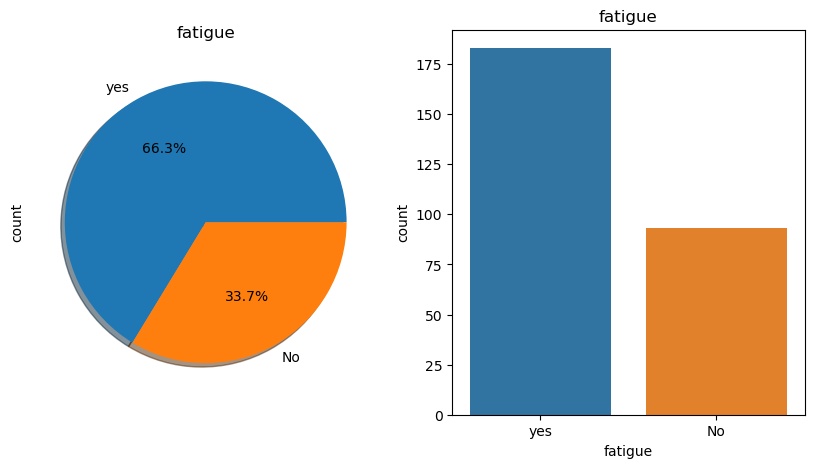

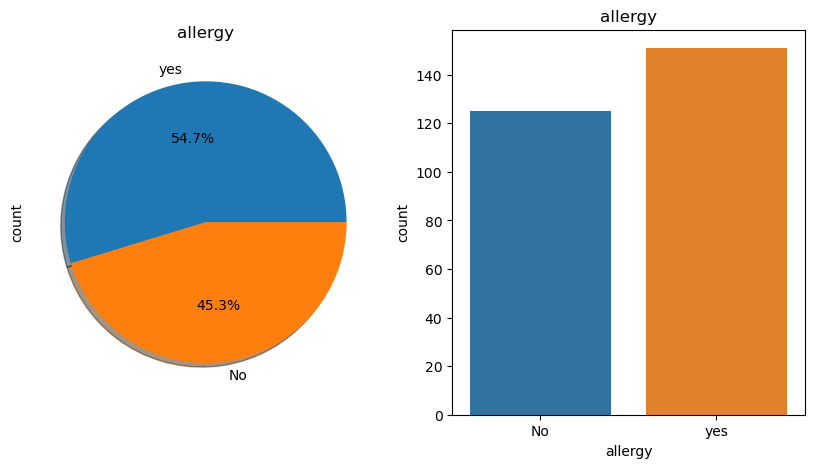

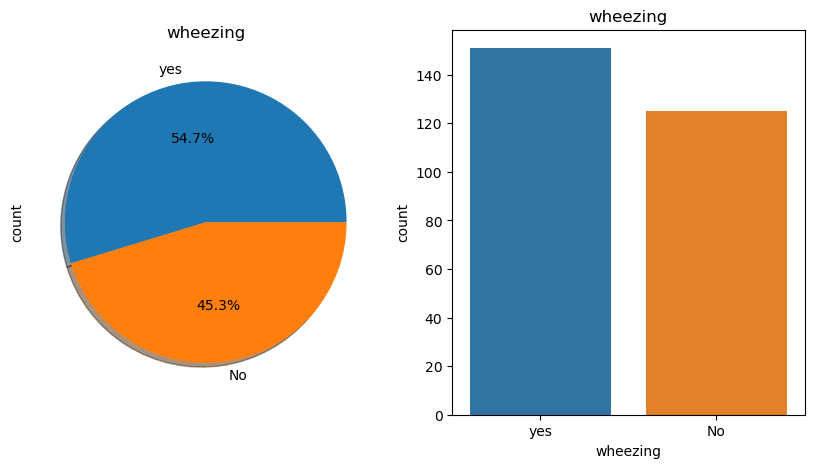

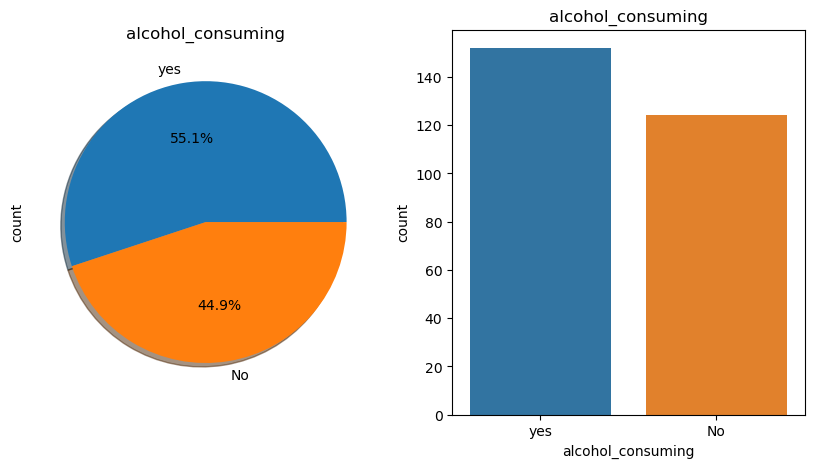

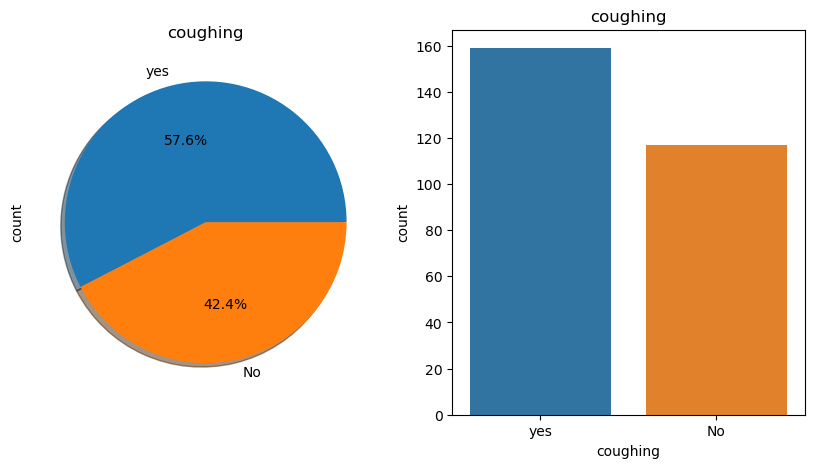

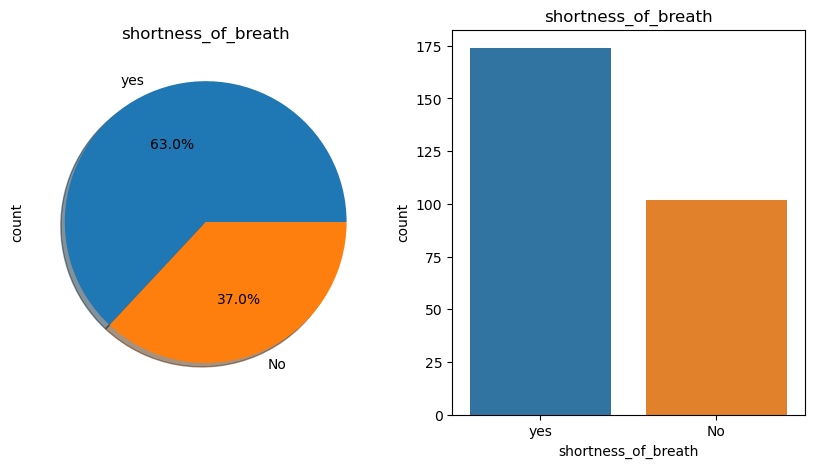

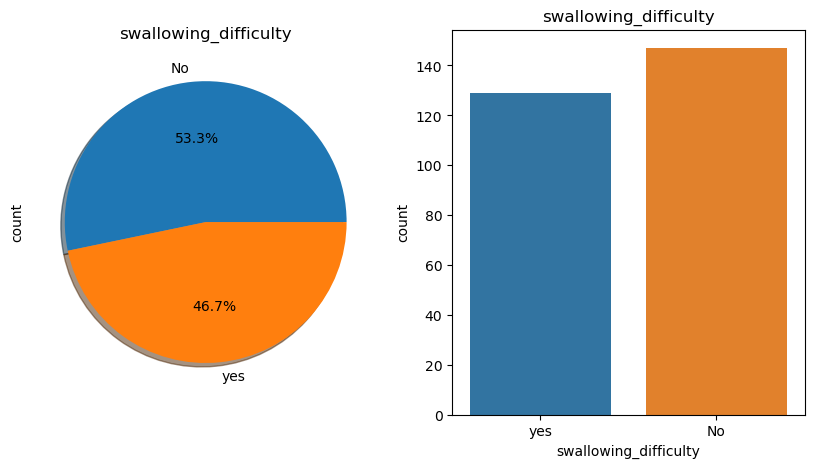

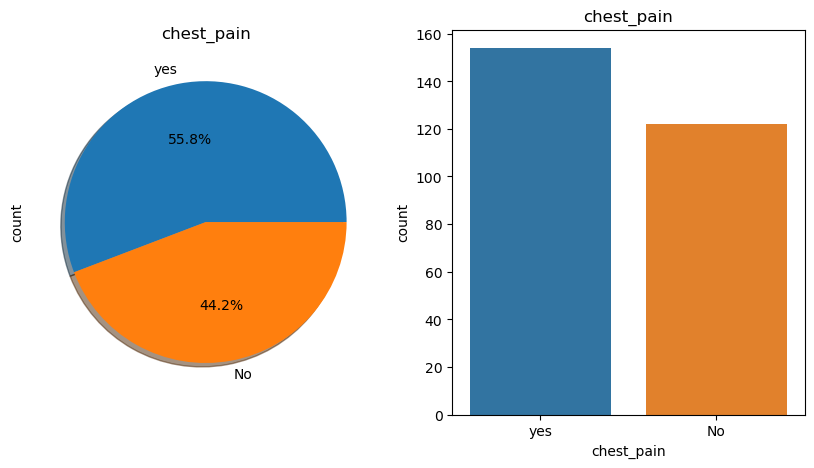

In [19]:
col=['smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain']

for i in col:
    df1=df.copy()
    df1[i]=df1[i].replace({1:"No",2:"yes"})
    f,axes=plt.subplots(1,2,figsize=(10,5))
    
    df1[i].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
    sns.countplot(x=df1[i],ax=axes[1])
    axes[0].set_title(i)
    axes[1].set_title(i)
    plt.show()

### Bivariate analysis

### age vs lung cancer

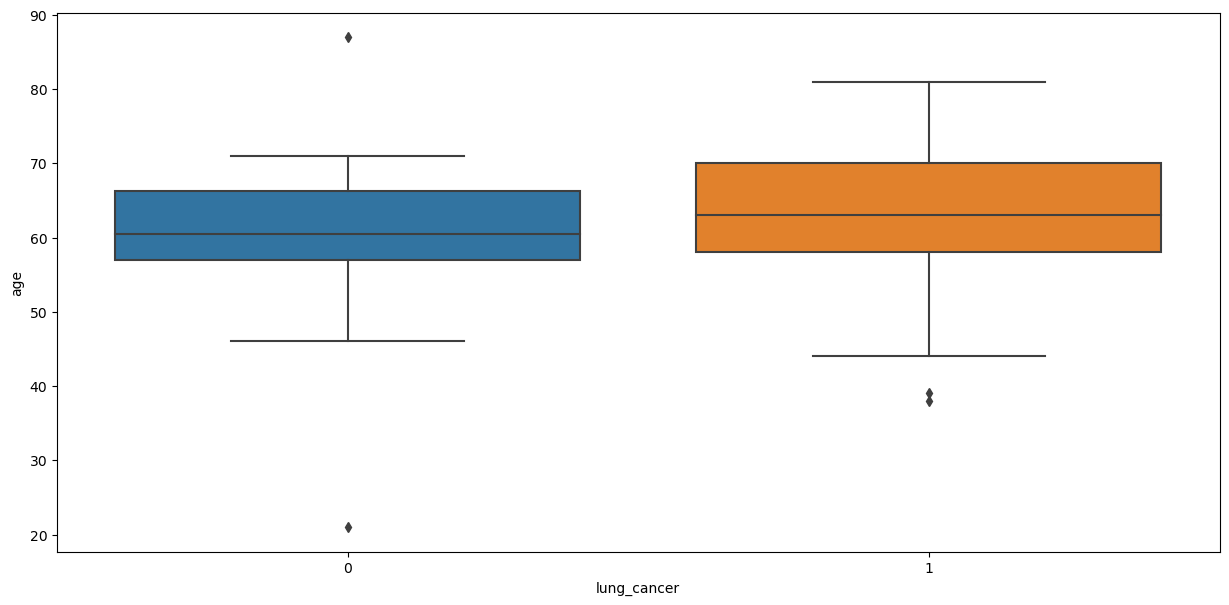

In [20]:
plt.figure(figsize=(15,7))
sns.boxplot(x='lung_cancer', y='age', data= df)
plt.show()

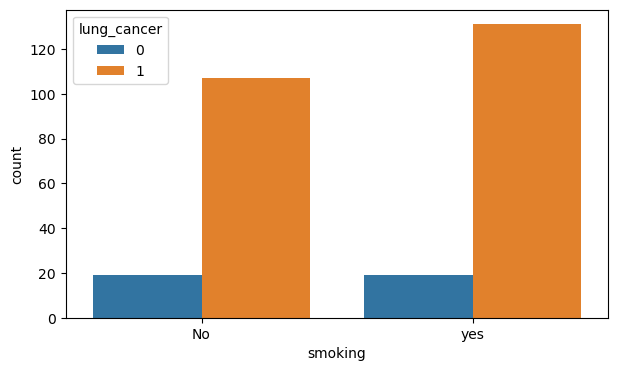

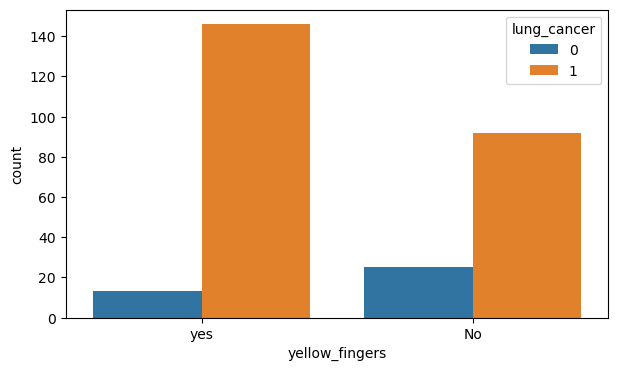

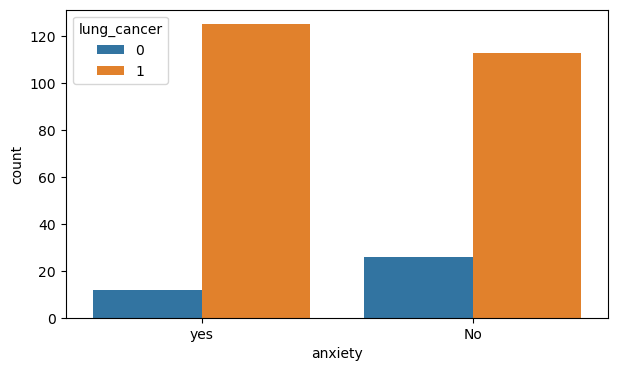

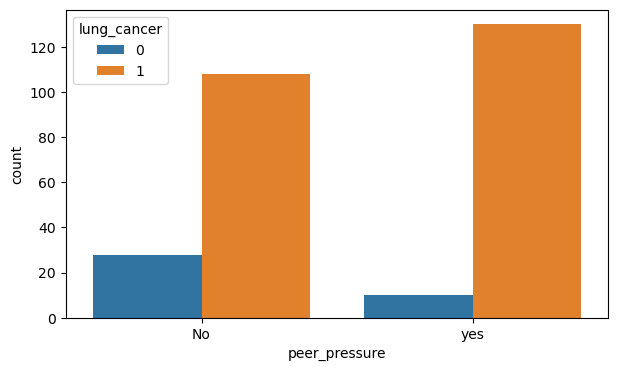

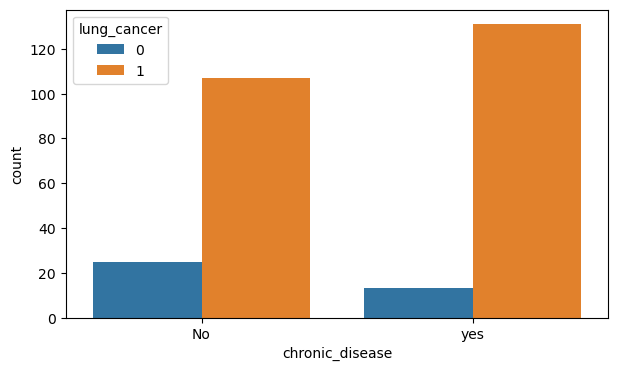

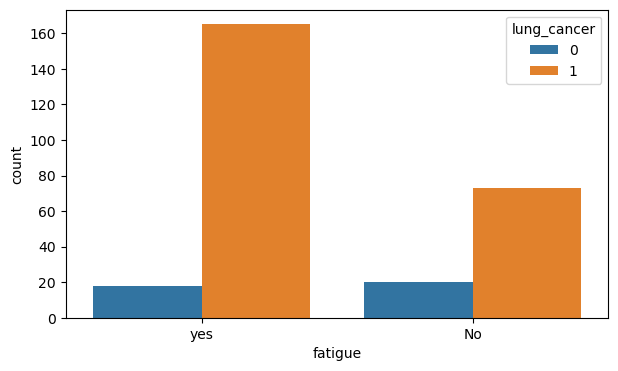

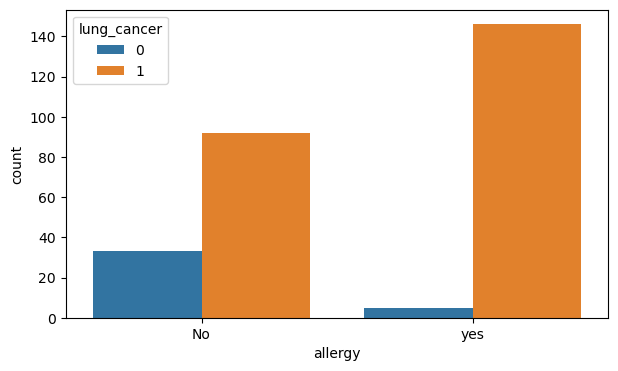

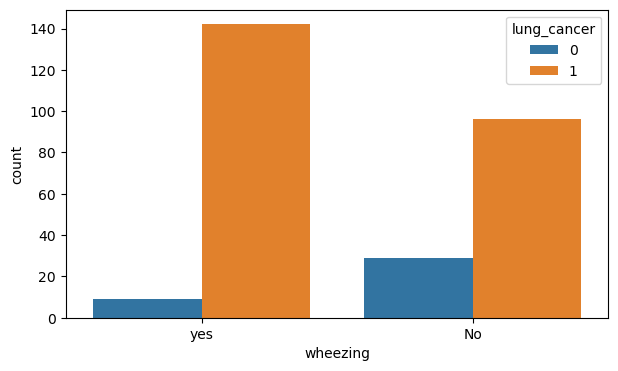

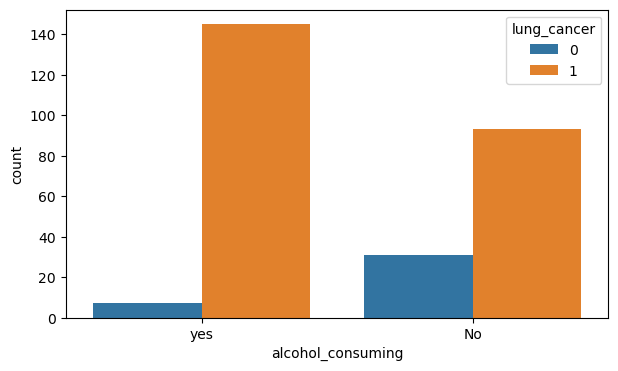

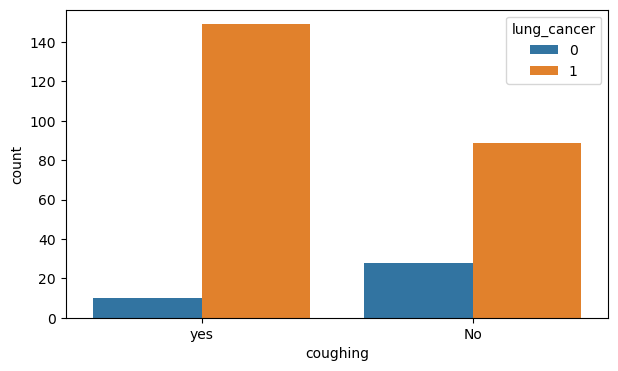

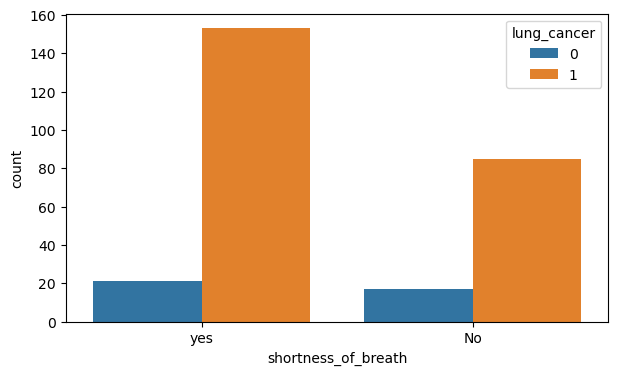

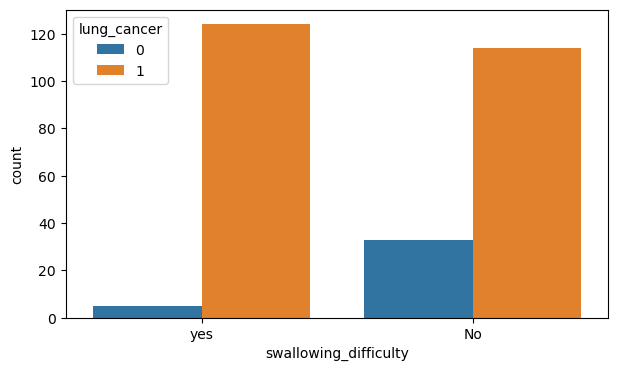

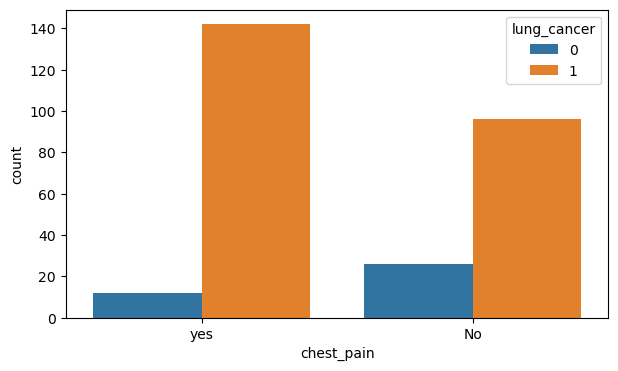

In [21]:
col=['smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain']

for i in col:
    df2=df.copy()
    df2[i]=df2[i].replace({1:"No",2:"yes"})
    plt.figure(figsize=(7,4))
    sns.countplot(x=df2[i],hue=df['lung_cancer'])

In [22]:
df

gender  age  smoking  yellow_fingers  anxiety  peer_pressure  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         2   59        1               1        1              2   
3         1   63        2               2        2              1   
4         2   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
279       2   59        1               2        2              2   
280       2   59        2               1        1              1   
281       1   55        2               1        1              1   
282       1   46        1               2        2              1   
283       1   60        1               2        2              1   

     chronic_disease  fatigue  allergy  wheezing  alcohol_consuming  coughing  \
0                  1        2        1         2                  2         2   
1                  2        2        2         1                  1         1   
2                  1        2        1         2                  1         2   
3                  1        1        1         1                  2         1   
4                  1        1        1         2                  1         2   
..               ...      ...      ...       ...                ...       ...   
279                1        1        2         2                  1         2   
280                2        2        2         1                  1         1   
281                1        2        2         1                  1         1   
282                1        1        1         1                  1         1   
283                1        2        1         2                  2         2   

     shortness_of_breath  swallowing_difficulty  chest_pain  lung_cancer  
0                      2                      2           2            1  
1                      2                      2           2            1  
2                      2                      1           2            0  
3                      1                      2           2            0  
4                      2                      1           1            0  
..                   ...                    ...         ...          ...  
279                    1                      2           1            1  
280                    2                      1           1            0  
281                    2                      1           2            0  
282                    1                      2           2            0  
283                    2                      2           2            1  

[276 rows x 16 columns]

<Axes: xlabel='gender', ylabel='count'>

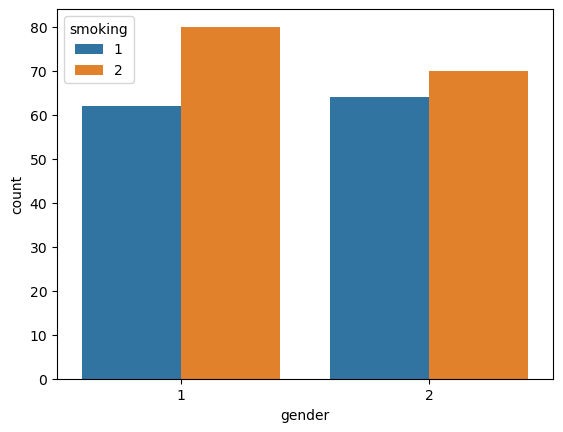

In [23]:

sns.countplot(data=df,x="gender",hue="smoking")

<Axes: xlabel='lung_cancer', ylabel='count'>

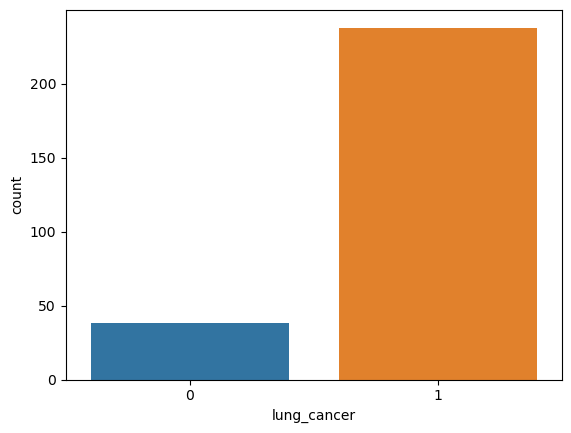

In [24]:
sns.countplot(data=df,x="lung_cancer")

<Axes: xlabel='gender', ylabel='smoking'>

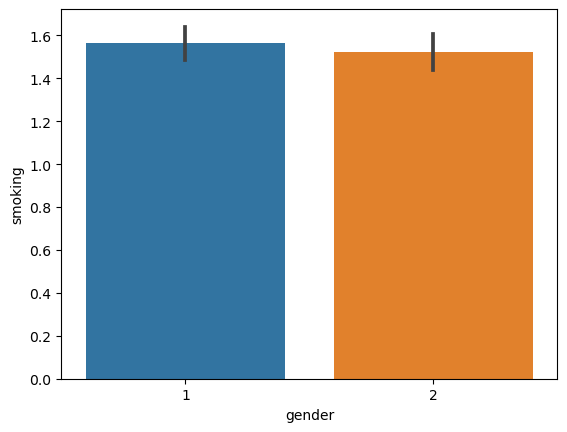

In [25]:
sns.barplot(x="gender",y="smoking",data=df)

#### age vs lung cancer

In [26]:
# Binning the age column
df['age_cat'] = pd.cut(df['age'],bins=[0,13,18,45,60,130],labels=['Children','Teens','Adults','Mid Adults','Elderly'])

C:\Users\Rv\AppData\Local\Temp\ipykernel_12884\1386929826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_cat'] = pd.cut(df['age'],bins=[0,13,18,45,60,130],labels=['Children','Teens','Adults','Mid Adults','Elderly'])


In [27]:
#age wise affect the lung cancer
df.groupby(["age_cat","lung_cancer"]).size().unstack(fill_value=0)

lung_cancer   0    1
age_cat             
Children      0    0
Teens         0    0
Adults        1    4
Mid Adults   18   85
Elderly      19  149

C:\Users\Rv\AppData\Local\Temp\ipykernel_12884\3067882978.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="age",hue="lung_cancer",data=df,shade=True,common_norm=False)


<Axes: xlabel='age', ylabel='Density'>

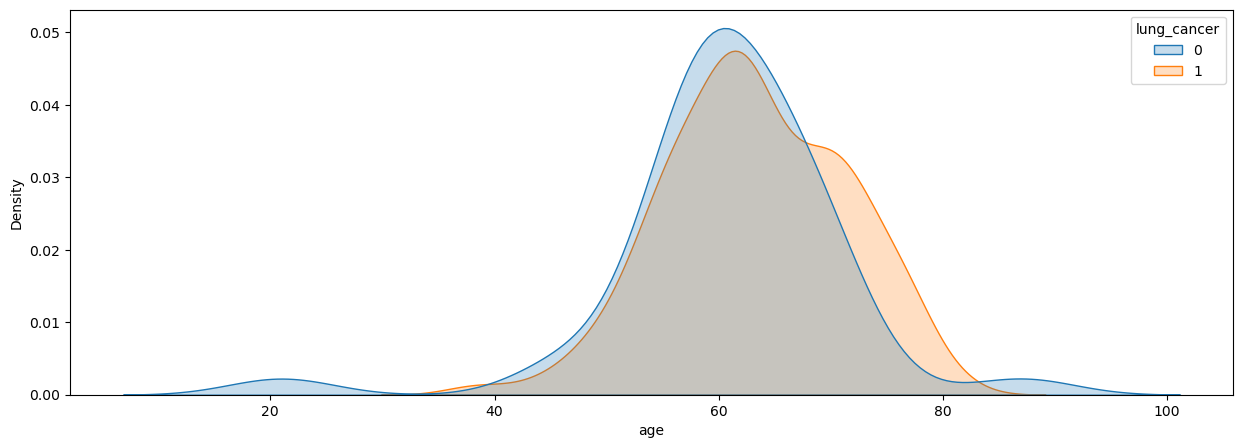

In [28]:
plt.figure(figsize=(15,5))
sns.kdeplot(x="age",hue="lung_cancer",data=df,shade=True,common_norm=False)

#### gender vs lung cancer

<Axes: xlabel='gender', ylabel='count'>

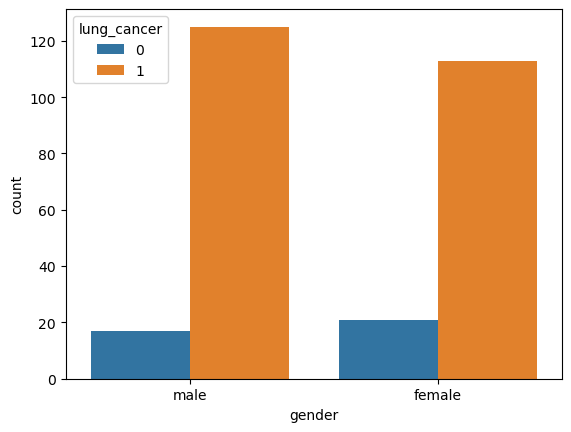

In [29]:
df_plot=df.copy()
df_plot["gender"]=df_plot["gender"].replace({1:"male",2:"female"})
sns.countplot(x="gender",hue="lung_cancer",data=df_plot)

In [30]:
df_plot=df.copy()
df_plot["gender"]=df_plot["gender"].replace({1:"male",2:"female"})
df_plot["smoking"]=pd.to_numeric(df_plot["smoking"])
df_plot["lung_cancer"]=pd.to_numeric(df_plot["lung_cancer"])

mentotal=len(df_plot[df_plot["gender"]=="male"])
ftotal=len(df_plot[df_plot["gender"]=="female"])
men_smoking_cancer=len(df_plot[(df_plot["gender"]=="male")&(df_plot["smoking"]==1)&(df["lung_cancer"]==1)])
f_smoking_cancer=len(df_plot[(df_plot["gender"]=="female")&(df_plot["smoking"]==1)&(df["lung_cancer"]==1)])
data={
    "gender":["male","female"],
    "total population":[mentotal,ftotal],
    "smoking_cancer":[men_smoking_cancer,f_smoking_cancer],
    "non_smoking_cancer":[mentotal-men_smoking_cancer,ftotal-f_smoking_cancer]
}

d=pd.DataFrame(data)


fig = px.bar(d,x="gender",y=["total population","smoking_cancer","non_smoking_cancer"],title="gender wise smoking/non smoking and cancer/no cancer ")
fig.update_layout(barmode='group')
fig.show()

<Axes: xlabel='smoking', ylabel='count'>

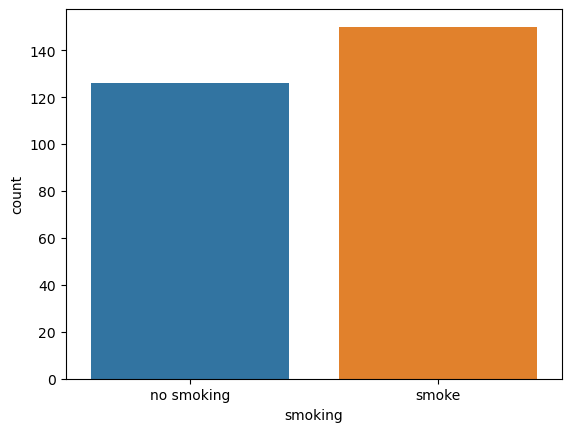

In [31]:
dfa=df.copy()
dfa["smoking"]=dfa["smoking"].replace({1:"no smoking",2:"smoke"})
sns.countplot(x="smoking",data=dfa)

In [32]:
# People who smoke and have lung cancer
sm1 = df[(df['smoking'] == 2) & (df['lung_cancer'] == 1)]

# People who smoke and don't have lung cancer
sm2 = df[(df['smoking'] == 2) & (df['lung_cancer'] == 0)]

# People who don't smoke and have lung cancer
sm3 = df[(df['smoking'] == 1) & (df['lung_cancer'] == 1)]

# People who don't smoke and don't have lung cancer
sm4 = df[(df['smoking'] == 1) & (df['lung_cancer'] == 0)]

sm1_percentage = round((len(sm1) / len(df[df['smoking'] == 2])) * 100,2)
sm2_percentage = round((len(sm2) / len(df[df['smoking'] == 2])) * 100,2)
sm3_percentage = round((len(sm3) / len(df[df['smoking'] == 1])) * 100,2)
sm4_percentage = round((len(sm4) / len(df[df['smoking'] == 1])) * 100,2)

print(f"The percentage of people who smoke and have lung cancer is {sm1_percentage:.2f}%")
print(f"The percentage of people who smoke and don't have lung cancer is {sm2_percentage:.2f}%")
print(f"The percentage of people who don't smoke and have lung cancer is {sm3_percentage:.2f}%")
print(f"The percentage of people who don't smoke and don't have lung cancer is {sm4_percentage:.2f}%")

The percentage of people who smoke and have lung cancer is 87.33%
The percentage of people who smoke and don't have lung cancer is 12.67%
The percentage of people who don't smoke and have lung cancer is 84.92%
The percentage of people who don't smoke and don't have lung cancer is 15.08%


Text(0.5, 1.0, "who don't smoke have lung cancer/no lung cancer")

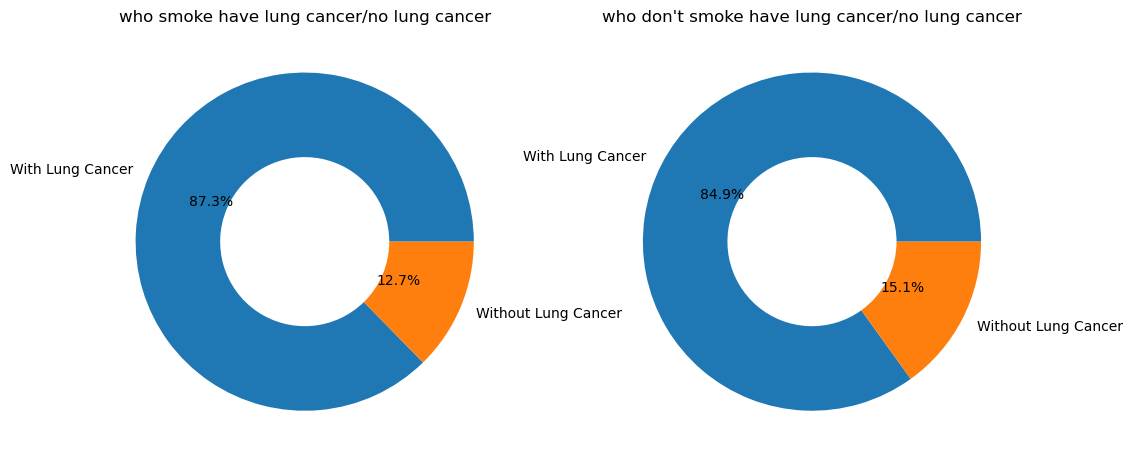

In [33]:
percentages1 = [sm1_percentage, sm2_percentage]
percentages2 = [sm3_percentage, sm4_percentage]
labels1 = ['With Lung Cancer', 'Without Lung Cancer']
labels2 = ['With Lung Cancer', 'Without Lung Cancer']
colors = ['#ff9f9f', '#a3a3ec']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
wedegs1,text1, autotext1 = axes[0].pie(
    percentages1, labels=labels1, autopct='%1.1f%%',wedgeprops=dict(width=0.5))
axes[0].set_title("who smoke have lung cancer/no lung cancer")

wedegs2,text2,autotext2=axes[1].pie(percentages2,labels=labels2,autopct="%1.1f%%",wedgeprops=dict(width=0.5))
axes[1].set_title("who don't smoke have lung cancer/no lung cancer")

>**People who smoke are slightly more likely in the risk of having lung cancer than the people who don't smoke and have lung cancer**

In [34]:
df

gender  age  smoking  yellow_fingers  anxiety  peer_pressure  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         2   59        1               1        1              2   
3         1   63        2               2        2              1   
4         2   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
279       2   59        1               2        2              2   
280       2   59        2               1        1              1   
281       1   55        2               1        1              1   
282       1   46        1               2        2              1   
283       1   60        1               2        2              1   

     chronic_disease  fatigue  allergy  wheezing  alcohol_consuming  coughing  \
0                  1        2        1         2                  2         2   
1                  2        2        2         1                  1         1   
2                  1        2        1         2                  1         2   
3                  1        1        1         1                  2         1   
4                  1        1        1         2                  1         2   
..               ...      ...      ...       ...                ...       ...   
279                1        1        2         2                  1         2   
280                2        2        2         1                  1         1   
281                1        2        2         1                  1         1   
282                1        1        1         1                  1         1   
283                1        2        1         2                  2         2   

     shortness_of_breath  swallowing_difficulty  chest_pain  lung_cancer  \
0                      2                      2           2            1   
1                      2                      2           2            1   
2                      2                      1           2            0   
3                      1                      2           2            0   
4                      2                      1           1            0   
..                   ...                    ...         ...          ...   
279                    1                      2           1            1   
280                    2                      1           1            0   
281                    2                      1           2            0   
282                    1                      2           2            0   
283                    2                      2           2            1   

        age_cat  
0       Elderly  
1       Elderly  
2    Mid Adults  
3       Elderly  
4       Elderly  
..          ...  
279  Mid Adults  
280  Mid Adults  
281  Mid Adults  
282  Mid Adults  
283  Mid Adults  

[276 rows x 17 columns]

In [35]:
#people who have consume aolcohol and cancer
am1=df[(df["alcohol_consuming"]==2)&(df["lung_cancer"]==1)]
#people who consume alcohol and no cancer
am2=df[(df["alcohol_consuming"]==2)&(df["lung_cancer"]==0)]
#people not consume alcohol and have cancer
am3=df[(df["alcohol_consuming"]==1)&(df["lung_cancer"]==1)]
#people not consume alcohol and no cancer
am4=df[(df["alcohol_consuming"]==1)&(df["lung_cancer"]==0)]


am1=round((len(am1)/len(df[df["alcohol_consuming"]==2]))*100)
am2=round((len(am2)/len(df[df["alcohol_consuming"]==2]))*100)

am3=round((len(am3)/len(df[df["alcohol_consuming"]==1]))*100)

am4=round((len(am4)/len(df[df["alcohol_consuming"]==1]))*100)

print(f"the people consume alcohol with cancer,{am1:.2f}%")

print(f"the people consume alcohol with no cancer,{am2:.2f}%")

print(f"the people not consume alcohol with cancer,{am3:.2f}%")

print(f"the people not consume alcohol with not cancer,{am4:.2f}%")

the people consume alcohol with cancer,95.00%
the people consume alcohol with no cancer,5.00%
the people not consume alcohol with cancer,75.00%
the people not consume alcohol with not cancer,25.00%


<Axes: xlabel='alcohol_consuming', ylabel='count'>

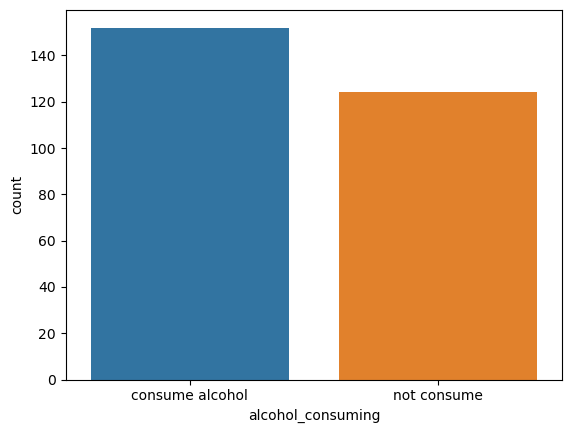

In [36]:
dfb=df.copy()
dfb["alcohol_consuming"]=dfb["alcohol_consuming"].replace({2:"consume alcohol",1:"not consume"})
sns.countplot(x="alcohol_consuming",data=dfb)

Text(0.5, 1.0, 'not consume alcohol-with cancer / no caner')

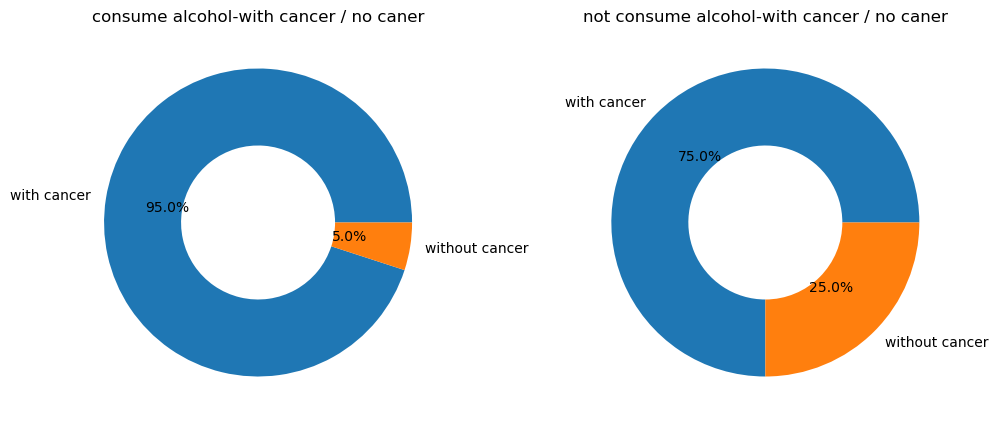

In [37]:
per1=[am1,am2]
per2=[am3,am4]
labels1=["with cancer","without cancer"]
labels2=["with cancer","without cancer"]
f,axes=plt.subplots(1,2,figsize=(12,5))
wedegs1,text1,autotext1=axes[0].pie(per1,labels=labels1,autopct="%1.1f%%",wedgeprops=dict(width=0.5))
axes[0].set_title("consume alcohol-with cancer / no caner")
wedegs1,text1,autotext1=axes[1].pie(per2,labels=labels2,autopct="%1.1f%%",wedgeprops=dict(width=0.5))
axes[1].set_title("not consume alcohol-with cancer / no caner")

### statistical testing

In [38]:

from scipy.stats import chi2_contingency
col=['smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain']
for i in col:
    contingency_tabel=pd.crosstab(df[i],df["lung_cancer"])
    chi2,p,_,_=chi2_contingency(contingency_tabel)
    alpha=0.05
    if p<alpha:
        print("{} There is significant relationship between {} and lung cancer".format("\033[1m",i))
    else:
        print("{} There is  no significant relation ship between the {} and lung cancer".format("\033[1m",i))

 There is  no significant relation ship between the smoking and lung cancer
 There is significant relationship between yellow_fingers and lung cancer
 There is significant relationship between anxiety and lung cancer
 There is significant relationship between peer_pressure and lung cancer
 There is significant relationship between chronic_disease and lung cancer
 There is significant relationship between fatigue and lung cancer
 There is significant relationship between allergy and lung cancer
 There is significant relationship between wheezing and lung cancer
 There is significant relationship between alcohol_consuming and lung cancer
 There is significant relationship between coughing and lung cancer
 There is  no significant relation ship between the shortness_of_breath and lung cancer
 There is significant relationship between swallowing_difficulty and lung cancer
 There is significant relationship between chest_pain and lung cancer


#### 95.4% of lung cancer cases occurring in individuals who consume alcohol. So people who consume are at high risk of having lung cancer

>**smoking,shortness of breath are no significant relation between lung cancer**

### model building

In [39]:
df = df.drop('age_cat',axis=1)
df

gender  age  smoking  yellow_fingers  anxiety  peer_pressure  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         2   59        1               1        1              2   
3         1   63        2               2        2              1   
4         2   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
279       2   59        1               2        2              2   
280       2   59        2               1        1              1   
281       1   55        2               1        1              1   
282       1   46        1               2        2              1   
283       1   60        1               2        2              1   

     chronic_disease  fatigue  allergy  wheezing  alcohol_consuming  coughing  \
0                  1        2        1         2                  2         2   
1                  2        2        2         1                  1         1   
2                  1        2        1         2                  1         2   
3                  1        1        1         1                  2         1   
4                  1        1        1         2                  1         2   
..               ...      ...      ...       ...                ...       ...   
279                1        1        2         2                  1         2   
280                2        2        2         1                  1         1   
281                1        2        2         1                  1         1   
282                1        1        1         1                  1         1   
283                1        2        1         2                  2         2   

     shortness_of_breath  swallowing_difficulty  chest_pain  lung_cancer  
0                      2                      2           2            1  
1                      2                      2           2            1  
2                      2                      1           2            0  
3                      1                      2           2            0  
4                      2                      1           1            0  
..                   ...                    ...         ...          ...  
279                    1                      2           1            1  
280                    2                      1           1            0  
281                    2                      1           2            0  
282                    1                      2           2            0  
283                    2                      2           2            1  

[276 rows x 16 columns]

In [40]:
x=df.drop("lung_cancer",axis=1)


y=df["lung_cancer"]


In [41]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

### logistic regression

Accuracy on Training data: 0.917098445595855
Accuracy on Test data: 0.9397590361445783
---------------------------------------------------------
precision score: 0.9726027397260274
recall score: 0.9594594594594594
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.97      0.96      0.97        74

    accuracy                           0.94        83
   macro avg       0.84      0.87      0.85        83
weighted avg       0.94      0.94      0.94        83

-----------------------------------------------------------


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Text(50.722222222222214, 0.5, 'Actual')

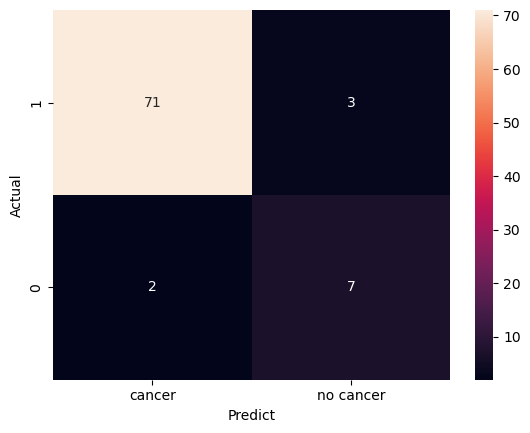

In [42]:
logit = LogisticRegression(random_state=0)
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )
print("---------------------------------------------------------")
print("precision score:",precision_score(y_test,logit_pred))
print("recall score:",recall_score(y_test,logit_pred))

print("-----------------------------------------------------------")

print(metrics.classification_report(y_test,logit_pred))

print("-----------------------------------------------------------")

cm=metrics.confusion_matrix(y_test,logit_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["cancer","no cancer"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

In [43]:
y_test.value_counts()

lung_cancer
1    74
0     9
Name: count, dtype: int64

### knn 

Accuracy on Training data: 0.8860103626943006
Accuracy on Test data: 0.8674698795180723
---------------------------------------------------------
precision score: 0.8987341772151899
recall score: 0.9594594594594594
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.25      0.11      0.15         9
           1       0.90      0.96      0.93        74

    accuracy                           0.87        83
   macro avg       0.57      0.54      0.54        83
weighted avg       0.83      0.87      0.84        83

-----------------------------------------------------------


Text(50.722222222222214, 0.5, 'Actual')

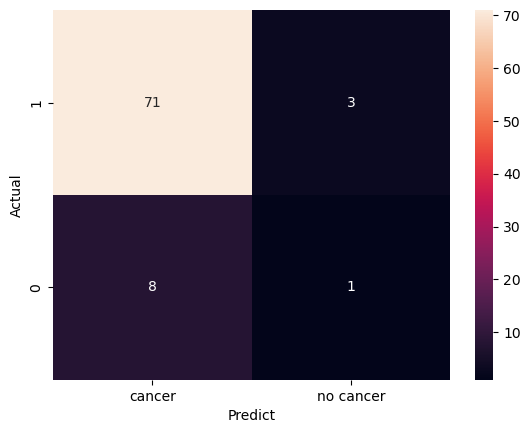

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print('Accuracy on Training data:',knn.score(X_train, y_train) )
print('Accuracy on Test data:',knn.score(X_test, y_test) )
print("---------------------------------------------------------")
print("precision score:",precision_score(y_test,knn_pred))
print("recall score:",recall_score(y_test,knn_pred))

print("-----------------------------------------------------------")

print(metrics.classification_report(y_test,knn_pred))

print("-----------------------------------------------------------")

cm=metrics.confusion_matrix(y_test,knn_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["cancer","no cancer"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

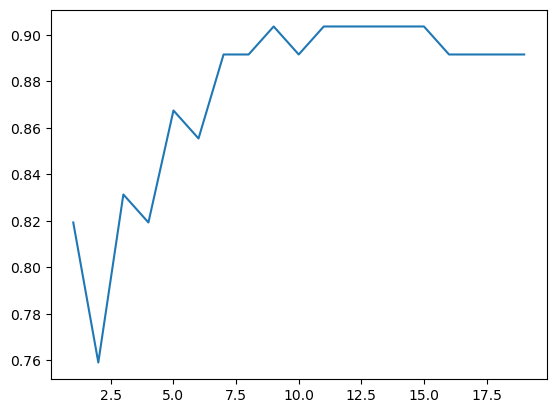

In [45]:
### fin dthe optimum k value
test_score=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    test_score.append(knn.score(X_test,y_test))
test_score


plt.plot(range(1,20),test_score)

Accuracy on Training data: 0.8601036269430051
Accuracy on Test data: 0.9036144578313253
---------------------------------------------------------
precision score: 0.9024390243902439
recall score: 1.0
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.90      1.00      0.95        74

    accuracy                           0.90        83
   macro avg       0.95      0.56      0.57        83
weighted avg       0.91      0.90      0.87        83

-----------------------------------------------------------


Text(50.722222222222214, 0.5, 'Actual')

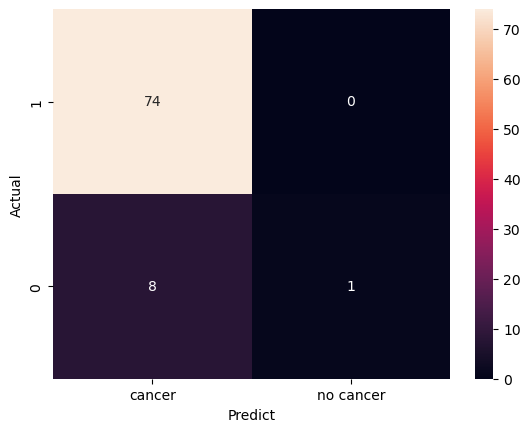

In [46]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print('Accuracy on Training data:',knn.score(X_train, y_train) )
print('Accuracy on Test data:',knn.score(X_test, y_test) )
print("---------------------------------------------------------")
print("precision score:",precision_score(y_test,knn_pred))
print("recall score:",recall_score(y_test,knn_pred))

print("-----------------------------------------------------------")

print(metrics.classification_report(y_test,knn_pred))

print("-----------------------------------------------------------")

cm=metrics.confusion_matrix(y_test,knn_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["cancer","no cancer"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

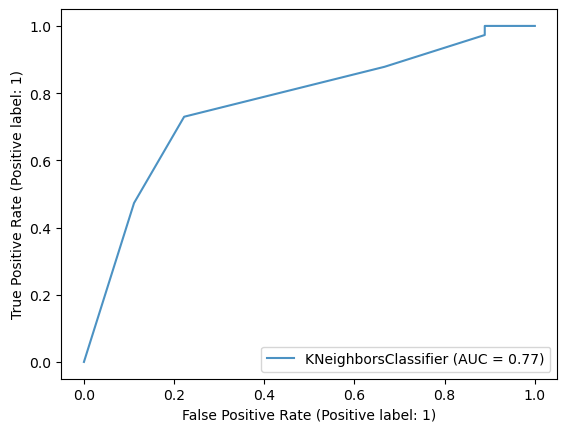

In [47]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(knn,X_test, y_test, ax=ax, alpha=0.8)
plt.show()

### gaussiian

training data: 0.9067357512953368
testing data: 0.891566265060241
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.96      0.92      0.94        74

    accuracy                           0.89        83
   macro avg       0.73      0.79      0.75        83
weighted avg       0.91      0.89      0.90        83

-----------------------------------------------------------------
accuracy score:  89.16 %
-----------------------------------------------------------------
confusion matrix


Text(50.722222222222214, 0.5, 'Actual')

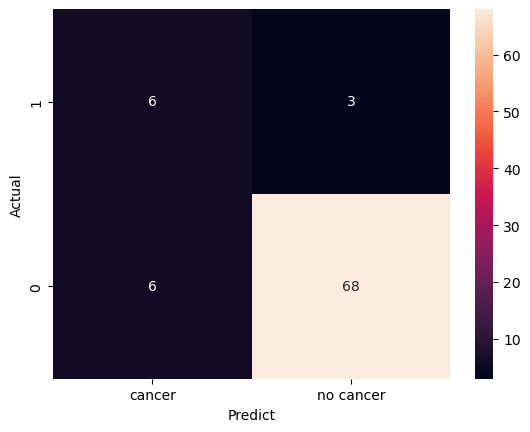

In [48]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()#by using default parameter
nb.fit(X_train,y_train)
nb_pre=nb.predict(X_test)#predict the test values


print("training data:",nb.score(X_train,y_train))
print("testing data:",nb.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,nb_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,nb_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,nb_pre)


cm=metrics.confusion_matrix(y_test,nb_pre)
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["cancer","no cancer"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")


### svm

training data: 0.8497409326424871
testing data: 0.891566265060241
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.89      1.00      0.94        74

    accuracy                           0.89        83
   macro avg       0.45      0.50      0.47        83
weighted avg       0.79      0.89      0.84        83

-----------------------------------------------------------------
accuracy score:  89.16 %
-----------------------------------------------------------------
confusion matrix


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Text(50.722222222222214, 0.5, 'Actual')

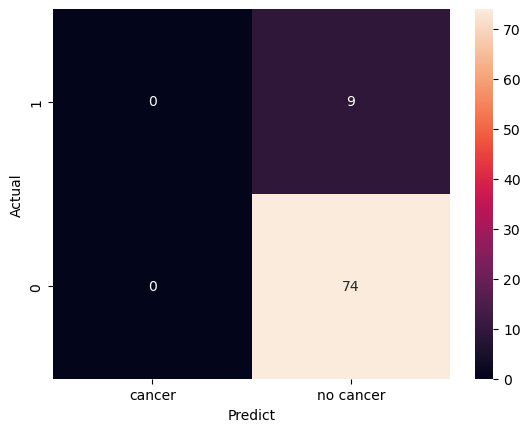

In [49]:
svc=SVC()#by using default parameter
svc.fit(X_train,y_train)
svc_pre=svc.predict(X_test)#predict the test values


print("training data:",svc.score(X_train,y_train))
print("testing data:",svc.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,svc_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,svc_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,svc_pre)


cm=metrics.confusion_matrix(y_test,svc_pre)
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["cancer","no cancer"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")


### random forest

training data: 1.0
testing data: 0.927710843373494
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.97      0.95      0.96        74

    accuracy                           0.93        83
   macro avg       0.80      0.86      0.83        83
weighted avg       0.94      0.93      0.93        83

-----------------------------------------------------------------
accuracy score:  92.77 %
-----------------------------------------------------------------
confusion matrix


Text(50.722222222222214, 0.5, 'Actual')

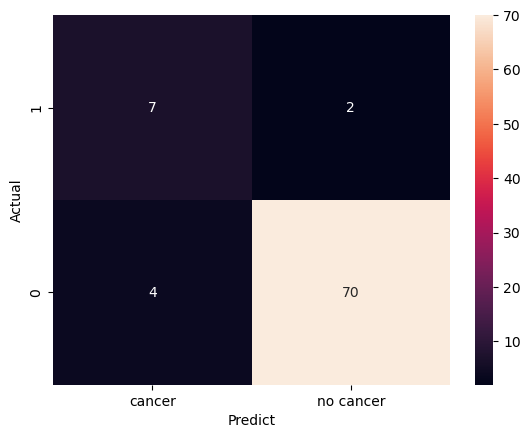

In [50]:
rfc=RandomForestClassifier(random_state=0)#by using default parameter
rfc.fit(X_train,y_train)
rfc_pre=rfc.predict(X_test)#predict the test values


print("training data:",rfc.score(X_train,y_train))
print("testing data:",rfc.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,rfc_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,rfc_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,rfc_pre)



cm=metrics.confusion_matrix(y_test,rfc_pre)
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["cancer","no cancer"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

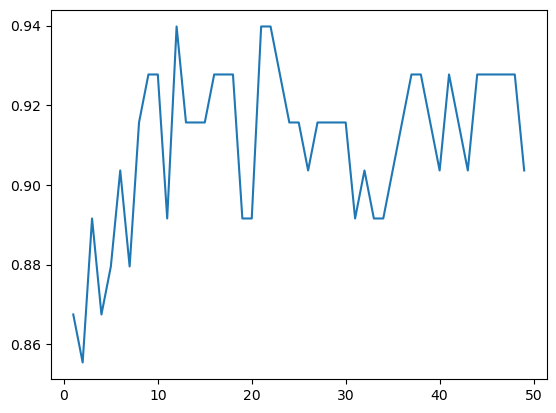

In [51]:
test_score=[]
for i in range(1,50):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    rf_pre=rf.predict(X_test)
    test_score.append(rf.score(X_test,y_test))
plt.plot(range(1,50),test_score)

In [52]:
Lr=LogisticRegression()
Knn=KNeighborsClassifier(n_neighbors=13)
Gn=GaussianNB()
Rf=RandomForestClassifier(n_estimators=9)
svc=SVC()
D_Tree=DecisionTreeClassifier()

In [53]:

models = []
models.append(('LR', Lr))
models.append(('KNN', Knn))
models.append(('NB', Gn))
models.append(("svc",svc))
models.append(("Rf",Rf))
models.append(("Dt",D_Tree))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model,  x,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Rv\anaconda3\lib\site-packages\sklearn\

LR: 0.895106 (0.060821)
KNN: 0.855159 (0.096914)
NB: 0.891005 (0.092269)
svc: 0.862302 (0.104404)
Rf: 0.884392 (0.052342)
Dt: 0.858598 (0.067883)


### HYPERPARAMETER TUNING

#### RANDOM FOREST MODEL

In [54]:
params = {'n_estimators':[10,20,30,40],"criterion":["gini","entropy"],'max_features': ['log2', 'sqrt'],'min_samples_split': [2, 3, 5]}#parameter

clf = RandomForestClassifier(random_state=0)#model 
gs = GridSearchCV(clf, params, scoring='accuracy',cv=5)
gs.fit(X_train, y_train)

print("Best set of Parameters",gs.best_params_)
print("Best Score",gs.best_score_)
df1=pd.DataFrame(gs.cv_results_)
df1=df1[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df1.insert(loc=0, column="model_name", value="Random_Forest")#assign new column in model name  use to verify the model parameter
df1

Best set of Parameters {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10}
Best Score 0.8865047233468285


model_name                                             params  \
24  Random_Forest  {'criterion': 'entropy', 'max_features': 'log2...   
36  Random_Forest  {'criterion': 'entropy', 'max_features': 'sqrt...   
6   Random_Forest  {'criterion': 'gini', 'max_features': 'log2', ...   
18  Random_Forest  {'criterion': 'gini', 'max_features': 'sqrt', ...   
17  Random_Forest  {'criterion': 'gini', 'max_features': 'sqrt', ...   

    mean_test_score  
24         0.886505  
36         0.886505  
6          0.886235  
18         0.886235  
17         0.886100

##### LOGISTICS MODEL

In [55]:
params = {'solver':["liblinear","lbfgs"],"penalty":["l1","l2","elasticent"],"C":[0.1,1,10,20],"class_weight":['balanced',"uniform"]}#model perameter

clf = LogisticRegression(random_state=0)#model
lr = GridSearchCV(clf, params, scoring='accuracy',cv=5)
lr.fit(X_train, y_train)

print("Best set of Parameters",lr.best_params_)
print("Best Score",lr.best_score_)
df2=pd.DataFrame(lr.cv_results_)
df2
df2=df2[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df2.insert(loc=0, column="model_name", value="Logistic")#assign new column in model name  use to verify the model parameter
df2

C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Rv\anaconda3\lib\site-packages\sklearn\

Best set of Parameters {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score 0.844804318488529


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Rv\anaconda3\lib\site-packages\sklearn\

model_name                                             params  \
15   Logistic  {'C': 1, 'class_weight': 'balanced', 'penalty'...   
3    Logistic  {'C': 0.1, 'class_weight': 'balanced', 'penalt...   
36   Logistic  {'C': 20, 'class_weight': 'balanced', 'penalty...   
24   Logistic  {'C': 10, 'class_weight': 'balanced', 'penalty...   
27   Logistic  {'C': 10, 'class_weight': 'balanced', 'penalty...   

    mean_test_score  
15         0.844804  
3          0.844669  
36         0.834143  
24         0.829015  
27         0.829015

##### KNN MODEL

In [56]:

params = {'n_neighbors':[7,9,11,13],"metric":["euclidean","manhattan","chebyshev"],'leaf_size' : [10, 20, 30, 50], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}#knn parameter

clf = KNeighborsClassifier()#model
knn = GridSearchCV(clf, params, scoring='accuracy',cv=5)
knn.fit(X_train, y_train)

print("Best set of Parameters",knn.best_params_)
print("Best Score",knn.best_score_)
df3=pd.DataFrame(knn.cv_results_)
df3
df3=df3[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df3.insert(loc=0, column="model_name", value="KNN")#assign new column in model name  use to verify the model parameter
df3

Best set of Parameters {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9}
Best Score 0.8601889338731443


model_name                                             params  \
29         KNN  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   
17         KNN  {'algorithm': 'auto', 'leaf_size': 20, 'metric...   
5          KNN  {'algorithm': 'auto', 'leaf_size': 10, 'metric...   
101        KNN  {'algorithm': 'kd_tree', 'leaf_size': 10, 'met...   
125        KNN  {'algorithm': 'kd_tree', 'leaf_size': 30, 'met...   

     mean_test_score  
29          0.860189  
17          0.860189  
5           0.860189  
101         0.860189  
125         0.860189

#### DECISION TREE

In [57]:
params = {'splitter':["best","random"],"criterion":["gini","entropy","log_loss"],'random_state':[101,42,0]}#parameter

clf = DecisionTreeClassifier()#model
dt = GridSearchCV(clf, params, scoring='accuracy',cv=5)
dt.fit(X_train, y_train)

print("Best set of Parameters",dt.best_params_)
print("Best Score",dt.best_score_)
df4=pd.DataFrame(dt.cv_results_)
df4
df4=df4[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df4.insert(loc=0, column="model_name", value="decision tree")#assign new column in model name  use to verify the model parameter
df4

Best set of Parameters {'criterion': 'gini', 'random_state': 42, 'splitter': 'random'}
Best Score 0.8549257759784077


model_name                                             params  \
3   decision tree  {'criterion': 'gini', 'random_state': 42, 'spl...   
5   decision tree  {'criterion': 'gini', 'random_state': 0, 'spli...   
2   decision tree  {'criterion': 'gini', 'random_state': 42, 'spl...   
17  decision tree  {'criterion': 'log_loss', 'random_state': 0, '...   
11  decision tree  {'criterion': 'entropy', 'random_state': 0, 's...   

    mean_test_score  
3          0.854926  
5          0.849798  
2          0.849663  
17         0.844669  
11         0.844669

#### NAVIE BAYES

In [58]:
params = {"var_smoothing":np.logspace(0,-9,num=100)}#parameter

clf = GaussianNB()#model
gnb = GridSearchCV(clf, params, scoring='accuracy',cv=5)
gnb.fit(X_train, y_train)

print("Best set of Parameters",gnb.best_params_)
print("Best Score",gnb.best_score_)
df5=pd.DataFrame(gnb.cv_results_)
df5
df5=df5[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df5.insert(loc=0, column="model_name", value="gaussian")#assign new column in model name  use to verify the model parameter
df5

Best set of Parameters {'var_smoothing': 0.0004328761281083057}
Best Score 0.9018893387314441


model_name                                    params  mean_test_score
37   gaussian  {'var_smoothing': 0.0004328761281083057}         0.901889
38   gaussian  {'var_smoothing': 0.0003511191734215131}         0.901889
39   gaussian  {'var_smoothing': 0.0002848035868435802}         0.901889
40   gaussian  {'var_smoothing': 0.0002310129700083158}         0.901889
31   gaussian  {'var_smoothing': 0.0015199110829529332}         0.901754

#### SVM MODEL

In [59]:
svm = GridSearchCV(SVC(gamma='auto'), {
        'C': [0.1,1,10,20],
        'kernel': ['rbf','linear',"poly"]
    }, 
    cv=5, 
    scoring="accuracy"
)
svm.fit(X_train,y_train)
print("best set of parameter",svm.best_params_)
print("best score:",svm.best_score_)
df6=pd.DataFrame(svm.cv_results_)
df6=df6[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df6.insert(loc=0, column="model_name", value="svm")#assign new column in model name  use to verify the model parameter
df6

best set of parameter {'C': 1, 'kernel': 'linear'}
best score: 0.8860998650472336


model_name                          params  mean_test_score
4         svm    {'C': 1, 'kernel': 'linear'}         0.886100
10        svm   {'C': 20, 'kernel': 'linear'}         0.875709
7         svm   {'C': 10, 'kernel': 'linear'}         0.870580
1         svm  {'C': 0.1, 'kernel': 'linear'}         0.855061
0         svm     {'C': 0.1, 'kernel': 'rbf'}         0.849798

In [60]:
best_model=pd.concat([df1,df2,df3,df4,df5,df6])
best_model

model_name                                             params  \
24   Random_Forest  {'criterion': 'entropy', 'max_features': 'log2...   
36   Random_Forest  {'criterion': 'entropy', 'max_features': 'sqrt...   
6    Random_Forest  {'criterion': 'gini', 'max_features': 'log2', ...   
18   Random_Forest  {'criterion': 'gini', 'max_features': 'sqrt', ...   
17   Random_Forest  {'criterion': 'gini', 'max_features': 'sqrt', ...   
15        Logistic  {'C': 1, 'class_weight': 'balanced', 'penalty'...   
3         Logistic  {'C': 0.1, 'class_weight': 'balanced', 'penalt...   
36        Logistic  {'C': 20, 'class_weight': 'balanced', 'penalty...   
24        Logistic  {'C': 10, 'class_weight': 'balanced', 'penalty...   
27        Logistic  {'C': 10, 'class_weight': 'balanced', 'penalty...   
29             KNN  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   
17             KNN  {'algorithm': 'auto', 'leaf_size': 20, 'metric...   
5              KNN  {'algorithm': 'auto', 'leaf_size': 10, 'metric...   
101            KNN  {'algorithm': 'kd_tree', 'leaf_size': 10, 'met...   
125            KNN  {'algorithm': 'kd_tree', 'leaf_size': 30, 'met...   
3    decision tree  {'criterion': 'gini', 'random_state': 42, 'spl...   
5    decision tree  {'criterion': 'gini', 'random_state': 0, 'spli...   
2    decision tree  {'criterion': 'gini', 'random_state': 42, 'spl...   
17   decision tree  {'criterion': 'log_loss', 'random_state': 0, '...   
11   decision tree  {'criterion': 'entropy', 'random_state': 0, 's...   
37        gaussian           {'var_smoothing': 0.0004328761281083057}   
38        gaussian           {'var_smoothing': 0.0003511191734215131}   
39        gaussian           {'var_smoothing': 0.0002848035868435802}   
40        gaussian           {'var_smoothing': 0.0002310129700083158}   
31        gaussian           {'var_smoothing': 0.0015199110829529332}   
4              svm                       {'C': 1, 'kernel': 'linear'}   
10             svm                      {'C': 20, 'kernel': 'linear'}   
7              svm                      {'C': 10, 'kernel': 'linear'}   
1              svm                     {'C': 0.1, 'kernel': 'linear'}   
0              svm                        {'C': 0.1, 'kernel': 'rbf'}   

     mean_test_score  
24          0.886505  
36          0.886505  
6           0.886235  
18          0.886235  
17          0.886100  
15          0.844804  
3           0.844669  
36          0.834143  
24          0.829015  
27          0.829015  
29          0.860189  
17          0.860189  
5           0.860189  
101         0.860189  
125         0.860189  
3           0.854926  
5           0.849798  
2           0.849663  
17          0.844669  
11          0.844669  
37          0.901889  
38          0.901889  
39          0.901889  
40          0.901889  
31          0.901754  
4           0.886100  
10          0.875709  
7           0.870580  
1           0.855061  
0           0.849798

In [61]:
best_model=best_model.sort_values(["mean_test_score"],ascending=False)
best_model

model_name                                             params  \
38        gaussian           {'var_smoothing': 0.0003511191734215131}   
37        gaussian           {'var_smoothing': 0.0004328761281083057}   
39        gaussian           {'var_smoothing': 0.0002848035868435802}   
40        gaussian           {'var_smoothing': 0.0002310129700083158}   
31        gaussian           {'var_smoothing': 0.0015199110829529332}   
36   Random_Forest  {'criterion': 'entropy', 'max_features': 'sqrt...   
24   Random_Forest  {'criterion': 'entropy', 'max_features': 'log2...   
18   Random_Forest  {'criterion': 'gini', 'max_features': 'sqrt', ...   
6    Random_Forest  {'criterion': 'gini', 'max_features': 'log2', ...   
4              svm                       {'C': 1, 'kernel': 'linear'}   
17   Random_Forest  {'criterion': 'gini', 'max_features': 'sqrt', ...   
10             svm                      {'C': 20, 'kernel': 'linear'}   
7              svm                      {'C': 10, 'kernel': 'linear'}   
29             KNN  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   
17             KNN  {'algorithm': 'auto', 'leaf_size': 20, 'metric...   
5              KNN  {'algorithm': 'auto', 'leaf_size': 10, 'metric...   
101            KNN  {'algorithm': 'kd_tree', 'leaf_size': 10, 'met...   
125            KNN  {'algorithm': 'kd_tree', 'leaf_size': 30, 'met...   
1              svm                     {'C': 0.1, 'kernel': 'linear'}   
3    decision tree  {'criterion': 'gini', 'random_state': 42, 'spl...   
5    decision tree  {'criterion': 'gini', 'random_state': 0, 'spli...   
0              svm                        {'C': 0.1, 'kernel': 'rbf'}   
2    decision tree  {'criterion': 'gini', 'random_state': 42, 'spl...   
15        Logistic  {'C': 1, 'class_weight': 'balanced', 'penalty'...   
11   decision tree  {'criterion': 'entropy', 'random_state': 0, 's...   
17   decision tree  {'criterion': 'log_loss', 'random_state': 0, '...   
3         Logistic  {'C': 0.1, 'class_weight': 'balanced', 'penalt...   
36        Logistic  {'C': 20, 'class_weight': 'balanced', 'penalty...   
27        Logistic  {'C': 10, 'class_weight': 'balanced', 'penalty...   
24        Logistic  {'C': 10, 'class_weight': 'balanced', 'penalty...   

     mean_test_score  
38          0.901889  
37          0.901889  
39          0.901889  
40          0.901889  
31          0.901754  
36          0.886505  
24          0.886505  
18          0.886235  
6           0.886235  
4           0.886100  
17          0.886100  
10          0.875709  
7           0.870580  
29          0.860189  
17          0.860189  
5           0.860189  
101         0.860189  
125         0.860189  
1           0.855061  
3           0.854926  
5           0.849798  
0           0.849798  
2           0.849663  
15          0.844804  
11          0.844669  
17          0.844669  
3           0.844669  
36          0.834143  
27          0.829015  
24          0.829015

>**Gaussian is best model**

training data: 0.9067357512953368
testing data: 0.9036144578313253
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.96      0.93      0.95        74

    accuracy                           0.90        83
   macro avg       0.75      0.80      0.77        83
weighted avg       0.91      0.90      0.91        83

-----------------------------------------------------------------
accuracy score:  90.36 %
-----------------------------------------------------------------
confusion matrix


Text(50.722222222222214, 0.5, 'Actual')

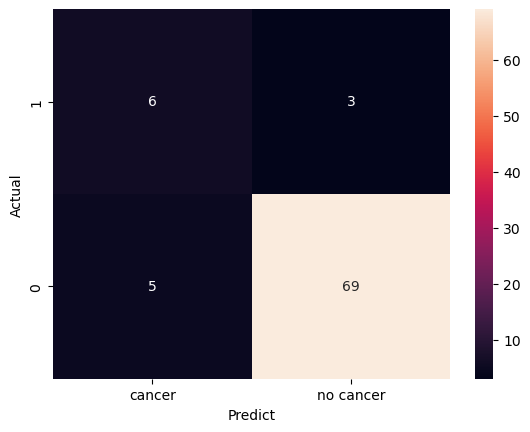

In [62]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB(var_smoothing= 0.0004328761281083057)#by using default parameter
nb.fit(X_train,y_train)
nb_pre=nb.predict(X_test)#predict the test values


print("training data:",nb.score(X_train,y_train))
print("testing data:",nb.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,nb_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,nb_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,nb_pre)


cm=metrics.confusion_matrix(y_test,nb_pre)
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["cancer","no cancer"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

>**5 FALSE POSITIVE,3 FALSE NEGATIVE,TURE POSITIVE 6,TURE NEGATIVE 69**

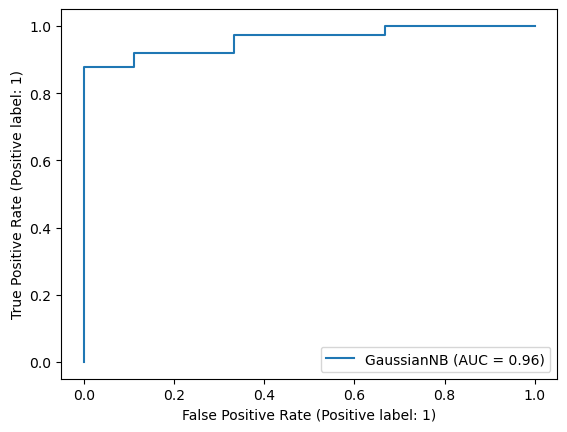

In [63]:
from sklearn.metrics import RocCurveDisplay
curve=RocCurveDisplay.from_estimator(nb,X_test,y_test)
plt.show(curve)

### PICKLE THE MODEL BY JOBLIB

In [64]:
import joblib
joblib.dump(nb,"nb")

['nb']

In [65]:
import joblib as jb
jb.dump(nb,"nb")
nb=jb.load("nb")
nb.score(X_test,y_test)

0.9036144578313253

In [66]:
nb=joblib.load("nb.joblib")

In [67]:
"""
import pickle # using pickle library 
with open('model_pickle', 'wb') as pickle_file:

    pickle.dump(rf, pickle_file)
    
    
with open('model_pickle', 'rb') as pickle_file:
rf_p = pickle.load(pickle_file)"""

"\nimport pickle # using pickle library \nwith open('model_pickle', 'wb') as pickle_file:\n\n    pickle.dump(rf, pickle_file)\n    \n    \nwith open('model_pickle', 'rb') as pickle_file:\nrf_p = pickle.load(pickle_file)"

# GUI

In [68]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox


In [69]:
root=Tk()
root.title("LUNG CANCER PREDICTION")
root.geometry("500x900")
root.configure(bg="black")
entries_frame=Frame(root,bg="black")
entries_frame.pack(side=TOP,fill=X)
title=Label(entries_frame,text="LUNG CANCER PREDICTION",font=("calibri",16,"bold"),bg="black",fg="white")
title.grid(row=0,column=1)
title=Label(entries_frame,text="M:1/F:2",font=("calibri",16,"bold"),bg="black",fg="white")
title.grid(row=1,column=2)
title=Label(entries_frame,text="YES:2/N0:1",font=("calibri",16,"bold"),bg="black",fg="white")
title.grid(row=2,column=2)




print("----------------------------------------------------------------------")
lblgender=Label(entries_frame,text="GENDER",font=("calibri",14),bg="black",fg='white')
lblgender.grid(row=3,column=1)

combogender=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="GENDER",state='readonly')
combogender["values"]=("1","2")
combogender.grid(row=3,column=2,padx=10,sticky=W)

print("----------------------------------------------------------------------")
lblage=Label(entries_frame,text="AGE",font=("calibri",14),bg="black",fg='white')
lblage.grid(row=4,column=1)

txtage=Entry(entries_frame,textvariable="AGE",width=10)
txtage.grid(row=4,column=2,padx=10,sticky=W)




print("----------------------------------------------------------------------")
lblsmoking=Label(entries_frame,text="SMOKE",font=("calibri",14),bg="black",fg='white')
lblsmoking.grid(row=5,column=1)

combosmoke=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="SMOKE",state='readonly')
combosmoke["values"]=("1","2")
combosmoke.grid(row=5,column=2,padx=5)




print("----------------------------------------------------------------------")
lbly_f=Label(entries_frame,text="YELLOW FINGERS",font=("calibri",14),bg="black",fg='white')
lbly_f.grid(row=6,column=1)

comboy_f=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="YELLOW FINGERS",state='readonly')
comboy_f["values"]=("1","2")
comboy_f.grid(row=6,column=2,padx=10,pady=10)



print("----------------------------------------------------------------------")
lblanxiety=Label(entries_frame,text="ANXIETY",font=("calibri",14),bg="black",fg='white')
lblanxiety.grid(row=7,column=1)

comboanxiety=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="ANXIETY",state='readonly')
comboanxiety["values"]=("1","2")
comboanxiety.grid(row=7,column=2,padx=5)



print("----------------------------------------------------------------------")
lblpeer_pressure=Label(entries_frame,text="PEER PRESSURE",font=("calibri",14),bg="black",fg='white')
lblpeer_pressure.grid(row=8,column=1)

combopeer_pressure=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="PEER PRESSURE",state='readonly')
combopeer_pressure["values"]=("1","2")
combopeer_pressure.grid(row=8,column=2,padx=5,pady=10)



print("----------------------------------------------------------------------")
lblchronic_disease=Label(entries_frame,text="CHRONIC DISEASE",font=("calibri",14),bg="black",fg='white')
lblchronic_disease.grid(row=9,column=1)

combochronic_disease=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="CHRONIC DISEASE",state='readonly')
combochronic_disease["values"]=("1","2")
combochronic_disease.grid(row=9,column=2,padx=5)





print("----------------------------------------------------------------------")
lblfatigue=Label(entries_frame,text="FATIGUE",font=("calibri",14),bg="black",fg='white')
lblfatigue.grid(row=10,column=1)

combofatigue=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="FATIGUE",state='readonly')
combofatigue["values"]=("1","2")
combofatigue.grid(row=10,column=2,padx=5,pady=10)



print("----------------------------------------------------------------------")
lblallergy=Label(entries_frame,text="ALLERGY",font=("calibri",14),bg="black",fg='white')
lblallergy.grid(row=11,column=1)

comboallergy=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="ALLERGY",state='readonly')
comboallergy["values"]=("1","2")
comboallergy.grid(row=11,column=2,padx=5)



print("----------------------------------------------------------------------")
lblwheezing=Label(entries_frame,text="WHEERING",font=("calibri",14),bg="black",fg='white')
lblwheezing.grid(row=12,column=1)

combowheezing=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="WHEERING",state='readonly')
combowheezing["values"]=("1","2")
combowheezing.grid(row=12,column=2,padx=5,pady=10)



print("----------------------------------------------------------------------")
lblalcohol_consuming=Label(entries_frame,text="ALCOHOL CONSUMING ",font=("calibri",14),bg="black",fg='white')
lblalcohol_consuming.grid(row=13,column=1)

comboalcohol_consuming=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="ALCOHOL CONSUMING ",state='readonly')
comboalcohol_consuming["values"]=("1","2")
comboalcohol_consuming.grid(row=13,column=2,padx=5)



print("----------------------------------------------------------------------")
lblcoughing=Label(entries_frame,text="COUGHING ",font=("calibri",14),bg="black",fg='white')
lblcoughing.grid(row=14,column=1)

combocoughing=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="COUGHING ",state='readonly')
combocoughing["values"]=("1","2")
combocoughing.grid(row=14,column=2,padx=5,pady=10)





print("----------------------------------------------------------------------")
lblshortness_of_breath=Label(entries_frame,text="SHORTNESS OF BREATH",font=("calibri",14),bg="black",fg='white')
lblshortness_of_breath.grid(row=15,column=1)

comboshortness_of_breath=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="SHORTNESS OF BREATH",state='readonly')
comboshortness_of_breath["values"]=("1","2")
comboshortness_of_breath.grid(row=15,column=2,padx=5)




print("----------------------------------------------------------------------")
lblswallowing_difficulty=Label(entries_frame,text="SWALLOWING DEFFICULTY",font=("calibri",14),bg="black",fg='white')
lblswallowing_difficulty.grid(row=16,column=1)

comboswallowing_difficulty=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="SWALLOWING DEFFICULTY",state='readonly')
comboswallowing_difficulty["values"]=("1","2")
comboswallowing_difficulty.grid(row=16,column=2,padx=5,pady=10)


print("----------------------------------------------------------------------")
lblchest_pain=Label(entries_frame,text="CHEST PAIN",font=("calibri",14),bg="black",fg='white')
lblchest_pain.grid(row=17,column=1)
combochest_pain=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="CHEST PAIN",state='readonly')
combochest_pain["values"]=("1","2")
combochest_pain.grid(row=17,column=2,padx=5,pady=2)




patient= Label(root, text='', bg= 'gray', fg='white', font=('Arial', 12, 'bold'))
patient.pack()


def predictor():  #function to perform the prediction
    
    
    model_nb= joblib.load('nb')
        
    gender = int(combogender.get())
    age = int(txtage.get())
    smoking= int(combosmoke.get())
    yellow_fingers= int(comboy_f.get())
    anxiety= int(comboanxiety.get())
    peer_pressure= int(combopeer_pressure.get())
    chronic_disease= int(combochronic_disease.get())
    fatigue= int(combofatigue.get())
    allergy= int(comboallergy.get())
    wheezing= int(combowheezing.get())
    alcohol_consuming= int(comboalcohol_consuming.get())
    coughing=int(combocoughing.get())
    shortness_of_breath= int(comboshortness_of_breath.get())
    swallowing_difficulties= int(comboswallowing_difficulty.get())
    chest_pain= int(combochest_pain.get())
    

    prediction= model_nb.predict([[gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulties,chest_pain]])
    
    if prediction== 0:
        patient.config(text= 'PATIENT HAS NO CANCER')
    else:
        patient.config(text= 'PATIENT HAS CANCER ')
        
but_frame=Frame(entries_frame,bg="black")

but_frame.grid(row=18,column=2,padx=4,pady=5,sticky=W)
butpridictor=Button(but_frame,command=predictor,text="RESULT",bg="yellow",fg="black",border=5).grid(row=19,column=2)



       
        
        
        
#label(root,text="flower",bg='red',foreground("black"))
root.mainloop()

----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
------

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Rv\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Rv\AppData\Local\Temp\ipykernel_12884\2242985922.py", line 179, in predictor
    gender = int(combogender.get())
ValueError: invalid literal for int() with base 10: ''
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Rv\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Rv\AppData\Local\Temp\ipykernel_12884\2242985922.py", line 192, in predictor
    swallowing_difficulties= int(comboswallowing_difficulty.get())
ValueError: invalid literal for int() with base 10: ''
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



### CONCLUSION

>**95.4% of lung cancer cases occurring in individuals who consume alcohol. So people who consume are at high risk of having lung cancer indicating the significant relationship between Alcohol consumption and Lung Cancer.**

>**People who smoke are slightly more likely in the risk of having lung cancer than the people who don't smoke and have lung cancer.**

>**Individuals who consume alcohol may be at a higher risk of experiencing chest pain. This chest pain, in certain instances, could potentially serve as an indicator or symptom of an underlying condition such as lung cancer.**